# Assignment 7
###### By Ian Pascoe
## Reading the Dataset

In [1]:
# generate the data
import matplotlib.pyplot as plt
import random
import pandas as pd

df = pd.read_csv("cars.csv")
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## Decision Tree Regression
### Linear Regression Model

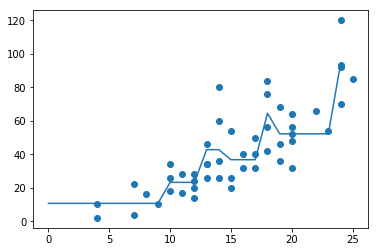

R^2 score: 0.76


In [2]:
# pick model
from sklearn.tree import DecisionTreeRegressor

x = df.drop(['dist'], axis=1)
y = df['dist']

model = DecisionTreeRegressor(max_depth=3)
model.fit(x, y)

# plot the model together with the data
xfit = pd.DataFrame([i for i in range(0, 25)])
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

# compute the R^2 score – good models: R^2 approx. 1
print("R^2 score: {0:.2f}".format(model.score(x,y)))

### Nonlinear Regression Model

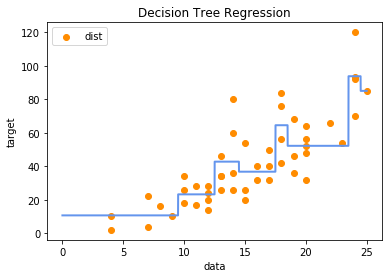

R^2 score: 0.76


In [4]:
import numpy as np

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(x, y)

# Predict
X_test = np.arange(0.0, 25.0, 0.001)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, c="darkorange")
plt.plot(X_test, y_1, color="cornflowerblue", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Show r2 score
print("R^2 score: {0:.2f}".format(regr_1.score(x,y)))

### Grid Search for Best Fit

Best parameters: {'max_depth': 3}


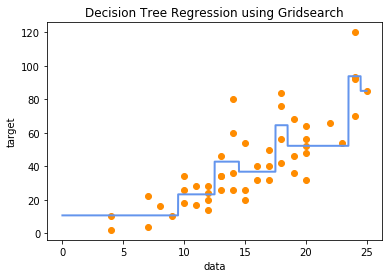

R^2 score: 0.76


In [5]:
from sklearn.model_selection import GridSearchCV

# setting up grid search
model = DecisionTreeRegressor()
param_grid = {'max_depth': list(range(1,20))}
grid = GridSearchCV(model, param_grid, cv=10)

# performing grid search
grid.fit(x,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# Predict
regr_1 = grid.best_estimator_
X_test = np.arange(0.0, 25.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, c="darkorange")
plt.plot(X_test, y_1, color="cornflowerblue", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression using Gridsearch")
plt.show()

print("R^2 score: {0:.2f}".format(regr_1.score(x,y)))

## KNN Regression
### Linear Regression Model

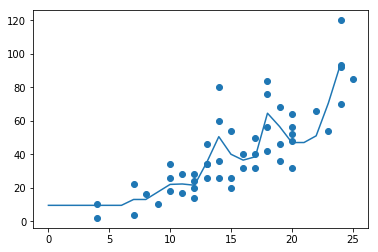

R^2 score: 0.76


In [7]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(x, y)

# plot the model together with the data
xfit = pd.DataFrame([i for i in range(0, 25)])
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(x,y)))

### Nonlinear Regression

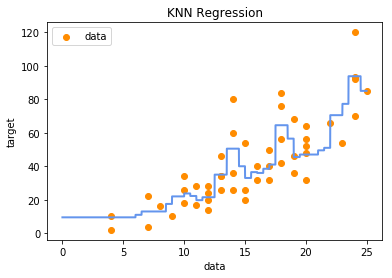

R^2 score: 0.76


In [8]:
# Fit regression model
regr_1 = KNeighborsRegressor(n_neighbors=4)
regr_1.fit(x, y)

# Predict
X_test = np.arange(0.0, 25.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("KNN Regression")
plt.legend()
plt.show()

print("R^2 score: {0:.2f}".format(regr_1.score(x,y)))

### Grid Search for Best Fit

Best parameters: {'n_neighbors': 5}


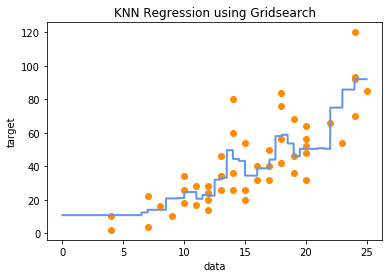

R^2 score: 0.7368165812204317


In [9]:
# setting up grid search
model = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,20))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(x,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# Predict
regr_1 = grid.best_estimator_
X_test = np.arange(0.0, 25.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, c="darkorange")
plt.plot(X_test, y_1, color="cornflowerblue", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("KNN Regression using Gridsearch")
plt.show()

print("R^2 score: {}".format(regr_1.score(x,y)))

## MLP Regression
### Linear Regression Model

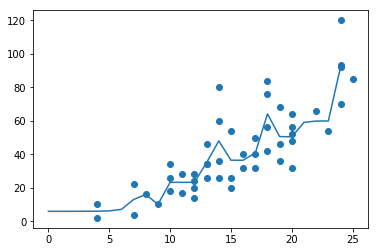

R^2 score: 0.79


In [11]:
# pick model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,30),
                     activation='logistic', max_iter=1000000)
model.fit(x, y)

# plot the model together with the data
Xfit = pd.DataFrame([i for i in range(0, 25)])
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(Xfit, yfit)
plt.show()

# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(x,y)))

### Nonlinear Regression Model

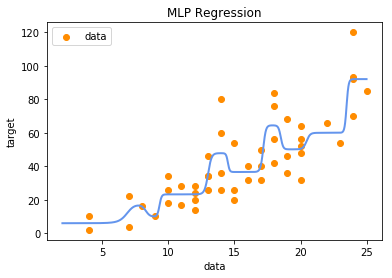

R^2 score: 0.78


In [12]:
# Fit regression model
regr_1 = MLPRegressor(hidden_layer_sizes=(60,40), activation='logistic', max_iter=1000000)
regr_1.fit(x, y)

# Predict
X_test = np.arange(2.0, 25.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("MLP Regression")
plt.legend()
plt.show()

print("R^2 score: {0:.2f}".format(regr_1.score(x,y)))

### Grid Search for Best Fit

Grid Search: best parameters: {'hidden_layer_sizes': (50, 30)}


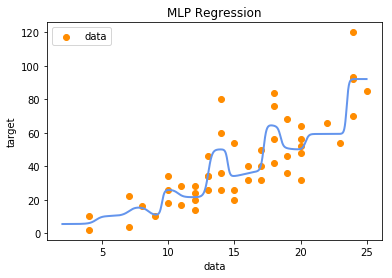

R^2 score: 0.79


In [18]:
# neural network
model = MLPRegressor(activation='logistic', max_iter=100000)

# grid search
param_grid = {'hidden_layer_sizes': [ (50,30), (60,40)]}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# Predict
regr_1 = grid.best_estimator_
X_test = np.arange(2.0, 25.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("MLP Regression")
plt.legend()
plt.show()

print("R^2 score: {0:.2f}".format(regr_1.score(x,y)))

## Conclusion
Above we see that the best fit for this data set is the MLP nonlinear regression model. Here we see with 50 hidden nodes, the R2 score is the highest of all the other methods at 79%.

## Team Assessment
I completed this assignment essentially on my own because my partners and I never exchanged emails.

In [9]:
    #df = userinput()
    sleep = [1, 1, 2, 3, 1, 2, 3]
    exercise = [2, 3, 1, 2, 1, 1, 2]
    water = [3, 1, 2, 1, 3, 3, 2]
    heartrate = [3,3,2,1,2,1,2]
    anxiety = [2,1,3,2,1,2,2]
    result = [1, 2, 3, 1, 2, 1, 1]
    data = {'sleep':sleep, 'heartrate':heartrate, 'exercise':exercise, 'water':water, 'anxiety':anxiety, 'predicted_anx':result}
    df = pd.DataFrame(data=data)
    df

,sleep,heartrate,exercise,water,anxiety,predicted_anx
0,1,3,2,3,2,1
1,1,3,3,1,1,2
2,2,2,1,2,3,3
3,3,1,2,1,2,1
4,1,2,1,3,1,2
5,2,1,1,3,2,1
6,3,2,2,2,2,1


In [14]:
    #Regression
    x = df.loc[1]
    y = df['predicted_anx']
    # pick model

    model = DecisionTreeRegressor(max_depth=2)
    model.fit(x, y)

    # plot the model together with the data
    xfit = pd.DataFrame([i for i in range(-1, 3)])
    yfit = model.predict(xfit)
    plt.scatter(x, y)
    plt.plot(xfit, yfit)
    plt.show()

    # compute the R^2 score – good models: R^2 approx. 1
    print("R^2 score: {}".format(model.score(x,y)))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 3. 3. 1. 1. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.